In [19]:
import simulation_settings as ss
import ship as ship
import constants
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import glob


In [2]:
gg = constants.gg
rho = constants.rho
beta = constants.beta
dt = constants.dt

0.005026548245743669


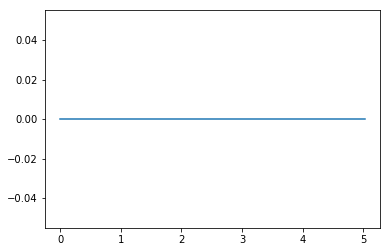

In [9]:
jj = ss.JONSWAP(1000,10,0.0)
x=np.arange(0,jj.N*jj.delta_omega,jj.delta_omega)
y=[]
for i in range(jj.N):
    y.append(jj.waves[i].amp)

plt.plot(x,y)
print(jj.delta_omega)

In [10]:
#create environment JONSWAP(num_waves, T_1, H_third)
T_1 = 6
H_3 = 0.0
ww = ss.JONSWAP(100,T_1,H_3)

Text(0.5, 1.0, 'Wave Profile T_1 =6[s], H_1/3 =0.0[m], t=10[s]')

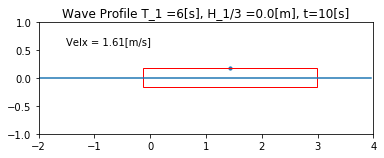

In [31]:
time = 40

xdata = np.arange(-2,4,0.05)
ydata = np.array([ww.get(x,time) for x in xdata])
fig, ax = plt.subplots()
ax.set_xlim(-2.0,4.0)
ax.set_ylim(-1,1)
ax.plot(xdata,ydata)
ax.scatter(pp.posx,pp.posz,s=10)

ts = ax.transData
coords = ts.transform([pp.posx,pp.posz])
tr = mpl.transforms.Affine2D().rotate_around(coords[0], coords[1], pp.angle)
tt = ts + tr
rec0 = patches.Rectangle((pp.posx-pp.pl/2,pp.posz-pp.ph),pp.pl,pp.ph,linewidth=1,edgecolor='r',facecolor='none', transform=tt)
ax.add_patch(rec0)

ax.text(-1.5,0.6,f"Velx = {pp.velx:.2f}[m/s]")
        
ax.set_aspect('equal', adjustable='box')

ax.set_title("Wave Profile T_1 =" + str(T_1) + "[s], H_1/3 =" + str(H_3) + "[m], t=" + str(round(t)) + "[s]")


In [15]:
pp = ship.Particle(0,0.18)
dt = 0.01
t=0.0
num =1000
force = 500
dl = []
xl = []
xvl = []
xal = []
zl = []
zvl= []
zal =[]
eng = []
pl = []
wil = []
fps = 50
limit = round(round(1./dt)/fps)

fileList = glob.glob('./output/*.png')
for filePath in fileList:
    try:
        os.remove(filePath)
    except:
        print("Error while deleting file : ", filePath)


for i in range(num):
    pp.update(ww,t,force)

    dl.append(pp.draught)
    xl.append(pp.posx)
    xvl.append(pp.velx)
    xal.append(pp.accx)
    zl.append(pp.posz)
    zvl.append(pp.velz)
    zal.append(pp.accz)
    wil.append(pp.wave_incline)
    pl.append(pp.angle*(180/math.pi))
    eng.append(pp.mass*pp.velz**2)

    #graph
    if(i%limit==0):
        xdata = np.arange(-2,4,0.05)
        ydata = np.array([ww.get(x,t) for x in xdata])
        fig, ax = plt.subplots()
        ax.set_xlim(-2.0,4.0)
        ax.set_ylim(-0.5,0.5)
        ax.plot(xdata,ydata)
        ax.scatter(pp.posx,pp.posz,s=10)
        
        ts = ax.transData
        coords = ts.transform([pp.posx,pp.posz])
        tr = mpl.transforms.Affine2D().rotate_around(coords[0], coords[1], pp.angle)
        tt = ts + tr
        rec0 = patches.Rectangle((pp.posx-pp.pl/2,pp.posz-pp.ph),pp.pl,pp.ph,linewidth=1,edgecolor='r',facecolor='none', transform=tt)
        ax.add_patch(rec0)

        ax.text(-1.5,0.6,f"Velx = {pp.velx:.2f}[m/s]")

        ax.set_aspect('equal', adjustable='box')

        ax.set_title("Wave Profile T_1 =" + str(T_1) + "[s], H_1/3 =" + str(H_3) + "[m], t=" + str(round(t)) + "[s]")
        fig.savefig("./output/"+f"{round(i/2):04d}.png")
        plt.clf()
        plt.close()
    t+=dt

os.system("ffmpeg -r 75 -f image2 -i ./output/%04d.png -vcodec libx264 -pix_fmt yuv420p ./output/T"+str(T_1)+"H"+str(H_3)+"F"+str(force)+".mp4")

r 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
Warning! Omega_e index over 60
War

0

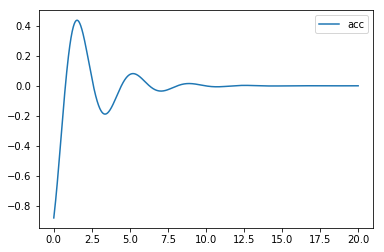

In [13]:
fig, ax = plt.subplots()
tdata = np.arange(0,num*dt,dt)
# ax.set_ylim(-0.5,0.5)
# ax.plot(tdata,xl,label="pos")
# ax.plot(tdata,zvl,label="vel")
ax.plot(tdata,zal,label="acc")
# ax.plot(tdata,dl,label="draught")
# ax.plot(tdata,eng,label="energy")
# ax.plot(tdata,pl,label="pitch angle")
# ax.plot(xl,zl)

# ax.plot(tdata,xvl,label="vel")

ax.legend()

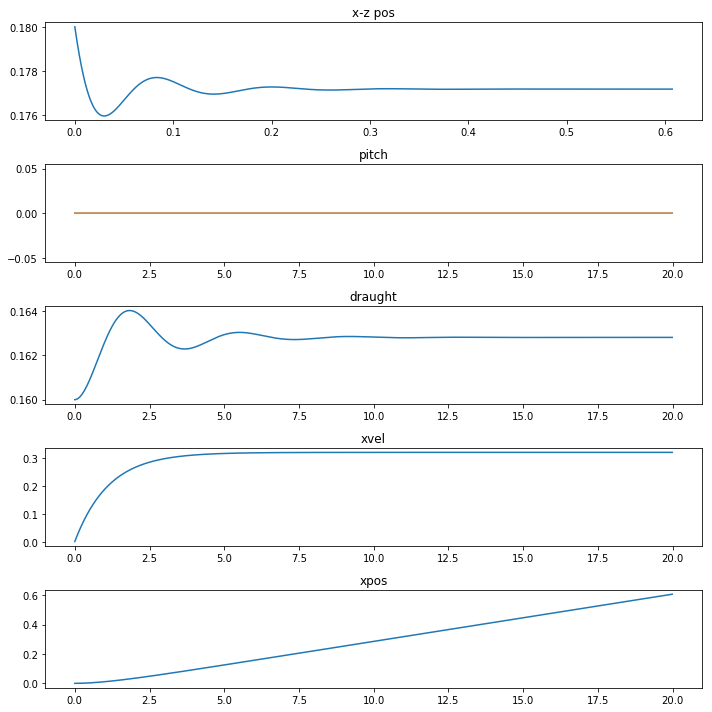

In [14]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5,figsize=(10,10))

ax1.plot(xl,zl)
ax1.set_title('x-z pos')

ax2.plot(tdata,pl)
ax2.plot(tdata,wil)
ax2.set_title('pitch')

ax3.plot(tdata,dl)
ax3.set_title('draught')

ax4.plot(tdata,xvl)
ax4.set_title('xvel')

ax5.plot(tdata,xl)
ax5.set_title('xpos')

fig.tight_layout()